<div style="background: linear-gradient(to right, #3498db, #2ecc71, #e74c3c); color: #fff; padding: 20px; text-align: center; font-size: 32px; font-weight: bold; font-family: 'Helvetica Neue', sans-serif;">
    💰 Census Income Project 💰
</div>

<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style=" padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #2ecc71;">D</span>
    <span style="color: #e74c3c;">e</span>
    <span style="color: #f39c12;">s</span>
    <span style="color: #3498db;">c</span>
    <span style="color: #2ecc71;">r</span>
    <span style="color: #e74c3c;">i</span>
    <span style="color: #f39c12;">p</span>
    <span style="color: #3498db;">t</span>
    <span style="color: #2ecc71;">i</span>
    <span style="color: #e74c3c;">o</span>
    <span style="color: #f39c12;">n</span>
</div>

### _Introduction_

The dataset used in this project was extracted from the 1994 Census Bureau database by Ronny Kohavi and Barry Becker, focusing on Data Mining and Visualization at Silicon Graphics. The dataset consists of reasonably clean records, filtered based on conditions such as age, income, final weight, and hours worked per week.

### _Objective_

The primary objective of this project is to predict whether an individual earns more than $50,000 annually. This prediction is crucial for understanding income distribution and socioeconomic patterns within the population.

### _Prediction Task_

Determine whether a person's income exceeds $50,000 a year.

### _Dataset Overview_

#### Features

- **AAGE:** Age of the individual (greater than 16 years old).
- **AGI:** Adjusted Gross Income.
- **AFNLWGT:** Final weight, a weighted estimate of the civilian non-institutional population of the US.
- **HRSWK:** Hours worked per week.

#### fnlwgt (Final Weight) Description

- The weights on the CPS files are controlled to independent estimates of the US population, incorporating controls for state, Hispanic origin, race, age, and sex.
- The term "estimate" refers to population totals derived from CPS by creating weighted tallies of specified socio-economic characteristics.
- The weighting program iteratively applies controls to ensure a comprehensive representation.

### _Significance_

Understanding income distribution is crucial for policymakers, researchers, and social scientists. Predicting income levels can assist in identifying key factors influencing financial well-being and inform targeted interventions to address economic disparities.

### _Dataset Link_

[Dataset - Census Income](https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv)

<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #2ecc71;">Importing</span>
    <span style="color: #e74c3c;">libraries</span>
    <span style="color: #f39c12;">and</span>
    <span style="color: #3498db;">data</span>
    <span style="color: #2ecc71;">collection</span>
</div>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #3498db;">Data</span>
    <span style="color: #2ecc71;">Analysis</span>
</div>`

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(keep='last', inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


Our dataframe comprises 32,560 rows and 15 columns. The dataframe contains two datatypes: 6 integer columns and 9 object columns.

**Data Inspection:**
- No missing values are observed initially.
- Initially, our dataframe contained 24 duplicate values.

**Data Cleaning:**
- Duplicate values have been removed by dropping the corresponding columns.
- Consequently, we now have no remaining duplicate values in the dataframe.

**Next Steps:**
- Further inspection will involve checking for white spaces in the data.

In [12]:
df.isin([' ','NA','-',' ?']).any()

Age               False
Workclass          True
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country     True
Income            False
dtype: bool

In [13]:
# Replacing those values with NAN
df = df.replace([' ', 'NA', '-', ' ?'], np.NaN)

In [14]:
df.isin([' ','NA','-',' ?']).any()

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

In [15]:
df.shape

(32536, 15)

In [16]:
# Checking for Missing values again
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


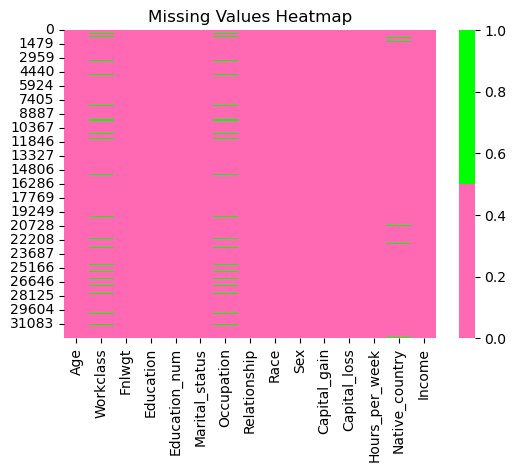

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap=['#FF69B4', '#00FF00'])
plt.title('Missing Values Heatmap')
plt.show()

In [26]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64']).columns

print('Categorical columns : ',categorical_columns)
print('\n')
print('Numerical_columns : ',numerical_columns)

Categorical columns :  Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


Numerical_columns :  Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


In [27]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [28]:
# Checking for Missing values again
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


## Missing Values Handling Summary

### 1. Initial Check:
   - After the initial check, no missing values were detected.

### 2. Detailed Examination:
   - Upon a more detailed examination, various representations of missing values such as ' ', 'NA', '-', and ' ?' were found in certain columns.
   - These representations were subsequently substituted with NaN.
   - This adjustment led to a dataframe with 32,536 rows and 15 columns.

   **Missing Values Information:**
   - Occupation: 1843 (5.664495%)
   - Workclass: 1836 (5.642980%)
   - Native_country: 582 (1.788788%)

### 3. Revisiting Missing Values:
   - Upon revisiting the issue of missing values, a total of 4,261 missing values were found in the dataframe.
   - Further analysis revealed that three columns exhibit missing values, constituting approximately 1 to 5.66% of their respective data.

### 4. Imputation:
   - Since three categorical columns with missing values were identified, the gaps were imputed with the most frequently occurring values.

### 5. Result:
   - Consequently, the dataframe is now free of any missing values.

<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #2ecc71;">Statistical</span>
    <span style="color: #e74c3c;">Analysis</span>
</div>

In [29]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Statistical Characteristics of Numerical Columns

- **Age:**
  - Range: 17 to 90 years
  - Average Age: ~38.59 years

- **Fnlwgt (Final Weight):**
  - Range: 12,285 to 1,484,705
  - Average Final Weight: ~189,784.3

- **Education_num:**
  - Range: 1 to 16 years
  - Average Education Years: ~10.08 years

- **Capital_gain:**
  - Range: 0 to 99,999
  - Average Capital Gain: ~1,078.41

- **Capital_loss:**
  - Range: 0 to 4,356
  - Average Capital Loss: ~87.37

- **Hours_per_week:**
  - Range: 1 to 99 hours
  - Average Hours per Week: ~40.44 hours

In [30]:
df.describe(include='object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24509,10494,14970,5979,13187,27794,21774,29734,24697


## Statistical Characteristics of Categorical Columns 

- **Workclass:**
  - Unique categories: 8
  - Most common: "Private" (24,509 occurrences)

- **Education:**
  - Unique categories: 16
  - Most common: "HS-grad" (10,494 occurrences)

- **Marital_status:**
  - Unique categories: 7
  - Most common: "Married-civ-spouse" (14,970 occurrences)

- **Occupation:**
  - Unique categories: 14
  - Most common: "Prof-specialty" (5,979 occurrences)

- **Relationship:**
  - Unique categories: 6
  - Most common: "Husband" (13,187 occurrences)

- **Race:**
  - Unique categories: 5
  - Most common: "White" (27,794 occurrences)

- **Sex:**
  - Binary categories: "Male" (21,774 occurrences)

- **Native_country:**
  - Unique categories: 41
  - Most common: "United-States" (29,734 occurrences)

- **Income:**
  - Unique categories: 2
  - Most common: "<=50K" (24,697 occurrences)

<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #2ecc71;">Data</span>
    <span style="color: #e74c3c;">Visualization</span>
</div>

        Count  Percentage
 <=50K  24697   75.906688
 >50K    7839   24.093312


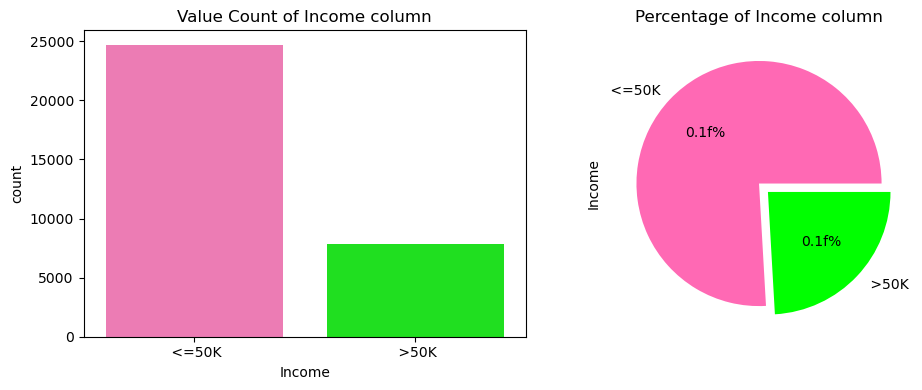

In [32]:
# Target Column
# Calculate value counts for our target 'Income' column
value_counts = df['Income'].value_counts()

# Calculate percentages
percentages = (value_counts / len(df)) * 100

# Combine value counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})

# Print the result DataFrame
print(result_df)

# Visualizing it:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First plot: Value count of the column using count plot
sns.countplot(x='Income', data=df, ax=axes[0], palette=['#FF69B4', '#00FF00'])
axes[0].set_title('Value Count of Income column')

# Second plot: Percentage of Income column
df['Income'].value_counts().plot(kind='pie', autopct="0.1f%%", explode=[0, 0.1], ax=axes[1], colors=['#FF69B4', '#00FF00'])
axes[1].set_title('Percentage of Income column')

plt.tight_layout()
plt.show()

**Observations:**

- The dataset exhibits an imbalanced income distribution, with around 76% of individuals earning less than or equal to $ 50,000 per year.

- Approximately 24% of individuals in the dataset earn more than $50,000 annually.
- The imbalanced distribution may impact model performance and requires consideration of appropriate techniques, such as oversampling, to address potential biases.

Workclass
           Workclass  Count  Percentage
0        Federal-gov    960    2.950578
1          Local-gov   2093    6.432874
2       Never-worked      7    0.021515
3            Private  24509   75.328866
4       Self-emp-inc   1116    3.430047
5   Self-emp-not-inc   2540    7.806737
6          State-gov   1297    3.986354
7        Without-pay     14    0.043029
Education
        Education  Count  Percentage
0            10th    933    2.867593
1            11th   1175    3.611384
2            12th    433    1.330834
3         1st-4th    166    0.510204
4         5th-6th    332    1.020408
5         7th-8th    645    1.982419
6             9th    514    1.579789
7      Assoc-acdm   1067    3.279444
8       Assoc-voc   1382    4.247603
9       Bachelors   5352   16.449471
10      Doctorate    413    1.269363
11        HS-grad  10494   32.253504
12        Masters   1722    5.292599
13      Preschool     50    0.153676
14    Prof-school    576    1.770347
15   Some-college   7282   2

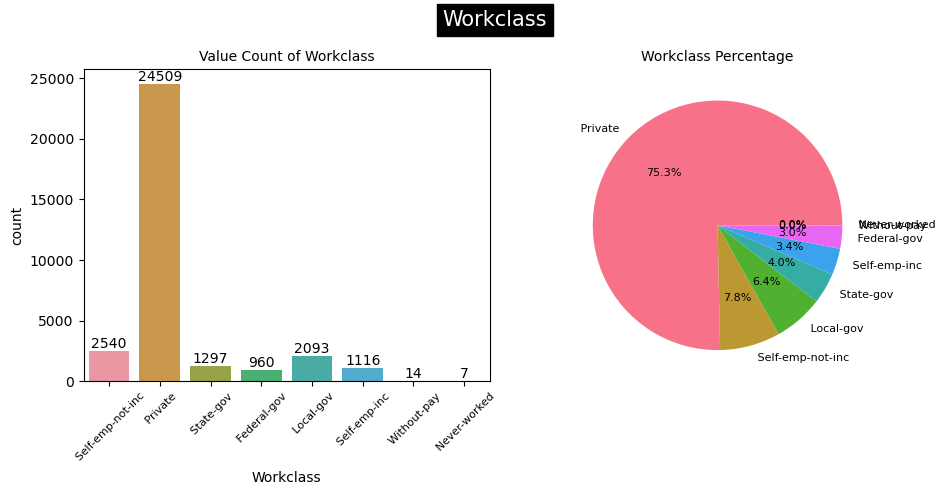

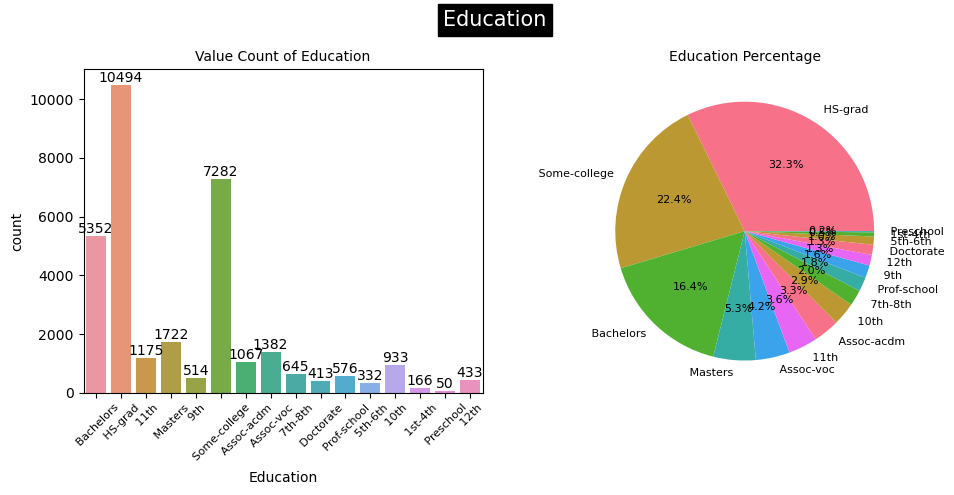

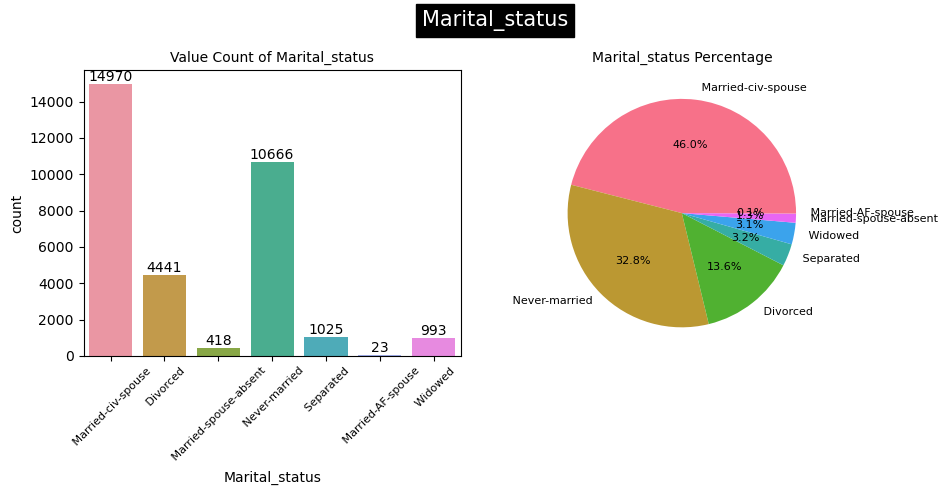

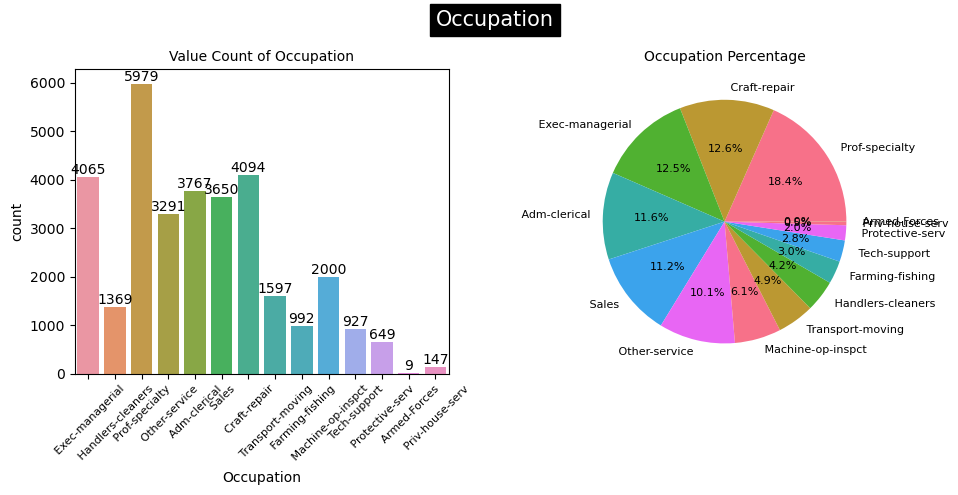

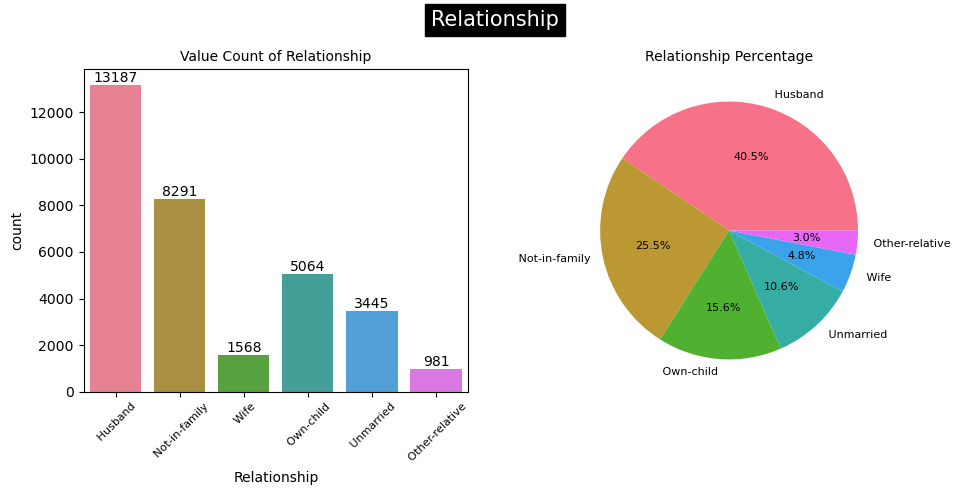

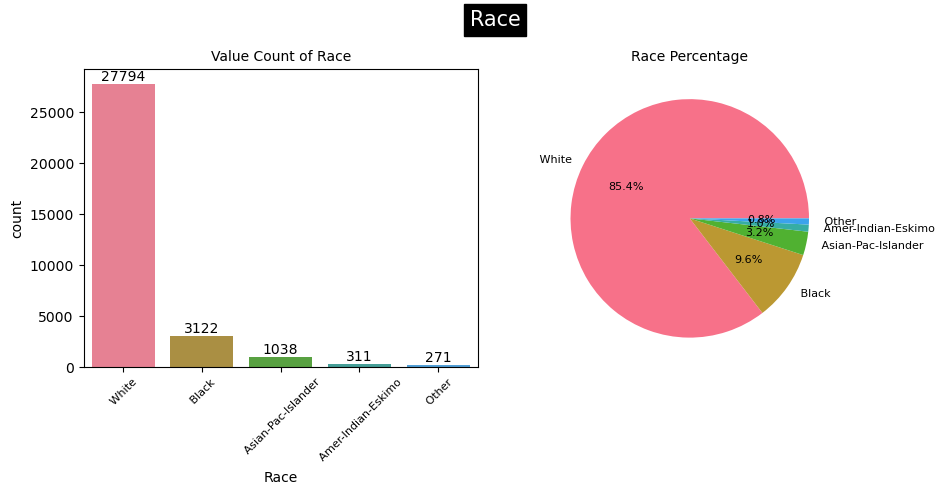

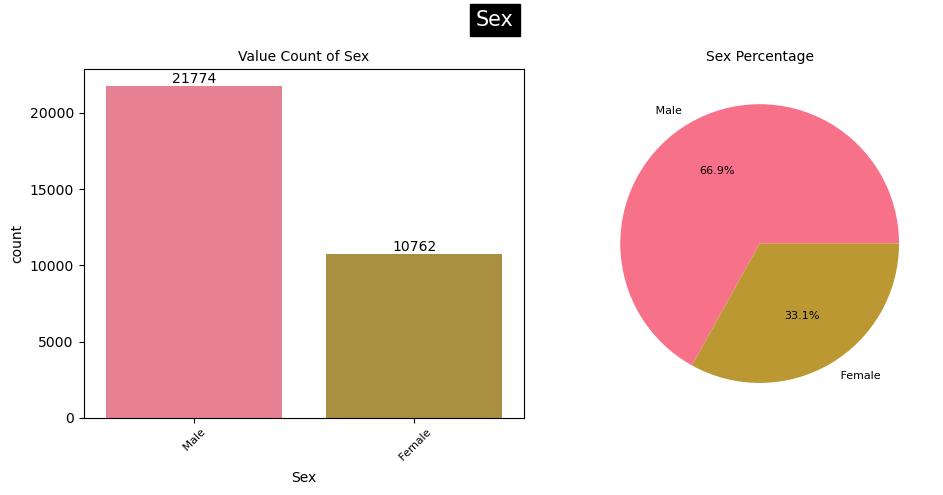

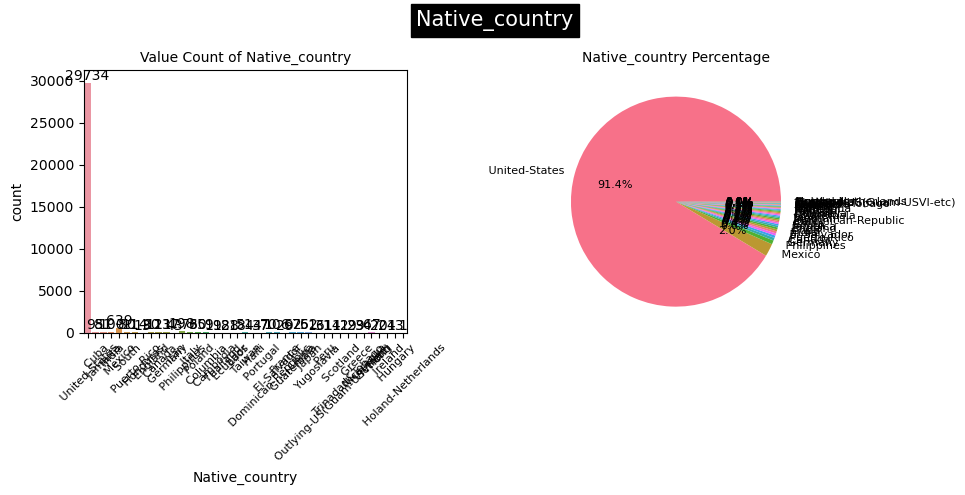

In [37]:
# Categorical columns
for i in categorical_columns[:-1]:
    print(i)
    result = df.groupby(i).size().reset_index(name='Count')
    result['Percentage'] = (result['Count'] / len(df)) * 100
    print(result)
    print('=' * 100)

# Visualizing it
cat_col = categorical_columns[:-1]

# Iterate over Categorical column
for i, column in enumerate(cat_col):
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.set_palette("husl")
    
    # Plot the countplot
    ax = sns.countplot(x=column, data=df, ax=axes[0])
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Value Count of {column}', fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)

    # Plot the pie chart
    column_counts = df[column].value_counts()
    ax = axes[1]
    ax.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', textprops={'fontsize': 8})
    ax.set_title(f'{column} Percentage', fontsize=10)
    
    fig.suptitle(column, fontsize=15, backgroundcolor='black', color='white')
    plt.tight_layout()
    plt.show()

**Observations:**

**Workclass:**
- "Private" workclass is predominant, comprising 75.33% of individuals.
- "Federal-gov," "Self-emp-inc," and "Local-gov" workclasses have noticeable presence, each accounting for a few percent.
- Categories like "Never-worked" and "Without-pay" have minimal representation, each below 1%.

**Education:**
- "HS-grad" is the most common education level, with 32.25% of individuals.
- "Some-college," "Bachelors," and "Masters" are other notable education categories.
- "Preschool" and "Doctorate" have relatively low representation, each below 2%.

**Marital_status:**
- "Married-civ-spouse" is the most common marital status, representing 46.01%.
- "Never-married" is the next most common category, with 32.78%.
- Other categories like "Divorced," "Separated," and "Widowed" have varying but lower representation.

**Occupation:**
- "Prof-specialty" and "Craft-repair" are the two most common occupations, each accounting for around 12.58%.
- Categories like "Exec-managerial," "Adm-clerical," and "Sales" also have significant presence.
- "Armed-Forces" and "Priv-house-serv" have very low representation, each less than 1%.

**Relationship:**
- "Husband" and "Not-in-family" are the two most common relationship categories, with 40.53% and 25.48%, respectively.
- "Wife," "Own-child," and "Unmarried" are other notable categories.
- "Other-relative" has relatively low representation, with 3.02%.

**Race:**
- "White" is the most common race category, representing 85.43%.
- Other race categories like "Black," "Asian-Pac-Islander," and "Amer-Indian-Eskimo" have lower representation.

**Sex:**
- Gender imbalance with 66.92% males and 33.08% females.

**Native_country:**
- "United-States" dominates native country, with 91.39%.
- Other countries have lower representation, some with less than 1%.

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


164190    13
123011    13
203488    13
121124    12
113364    12
          ..
140176     1
318264     1
329205     1
171373     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64


0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


40    15203
50     2817

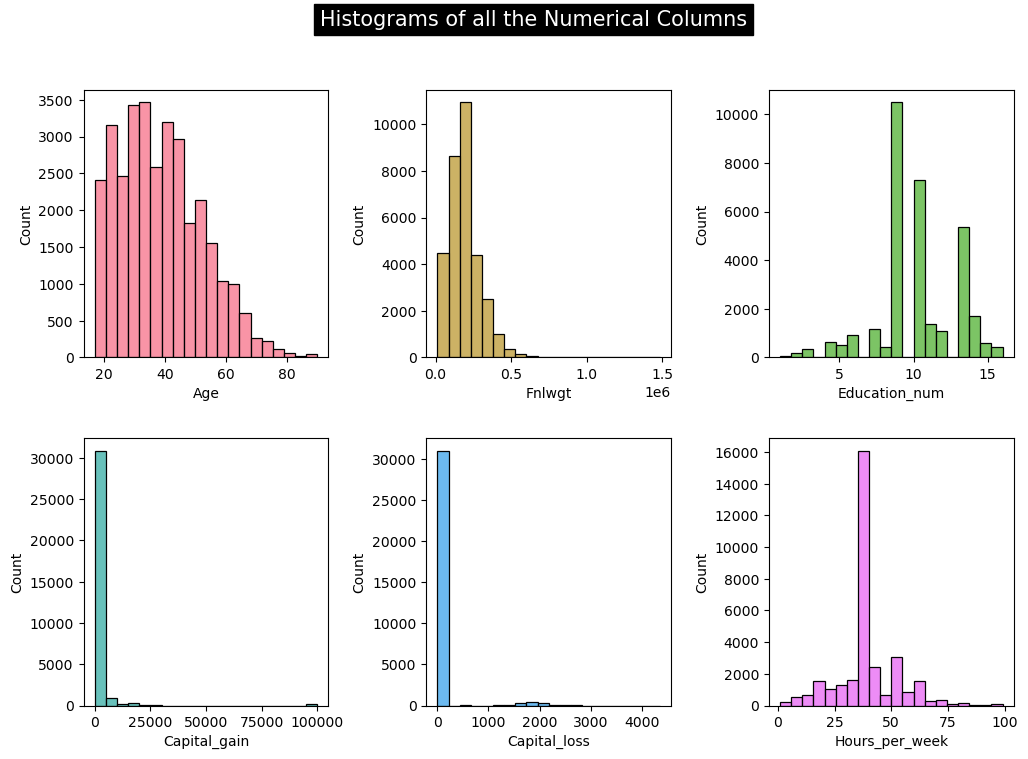

In [39]:
# Numerical Columns
for i in numerical_columns:
    print(df[i].value_counts())
    print("\n")

# Visualizing it using Histogram
plt.figure(figsize=(12, 8), facecolor='white')
plotnumber = 1
for column in numerical_columns:
    if plotnumber <= 6:
        ax = plt.subplot(2, 3, plotnumber)
        sns.histplot(df[column], color=sns.color_palette("husl")[plotnumber - 1], bins=20)
        plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.suptitle("Histograms of all the Numerical Columns", fontsize=15, backgroundcolor='black', color='white')
plt.show()

**Observations:**

**Age:**
- Diverse age range, with the majority clustered in their late 30s to early 40s.
- Dataset includes individuals across various age groups, with a minimum age of 1 and a maximum of 90.

**Fnlwgt:**
- Represents final weights assigned to individuals in a survey or dataset.
- Wide range of final weights, from 1 to 164,190, with the majority having higher weights.
- Contextual understanding of these weights is essential for interpreting their significance.

**Education_num:**
- Encodes education levels numerically, ranging from 1 to 16.
- "9" (HS-grad) is the most common education level, followed by "10" (Some-college) and "13" (Bachelors).

**Capital_gain:**
- Represents capital gains and varies widely.
- Most individuals have a capital gain of 0, but some show higher gains, reaching up to 99,999.

**Capital_loss:**
- Represents capital losses.
- Similar to capital gains, the majority have a loss of 0, but higher losses are observed.

**Hours_per_week:**
- Represents the number of hours worked per week.
- Most individuals work around 40 hours, typical for a full-time job, with variations among those working longer hours.


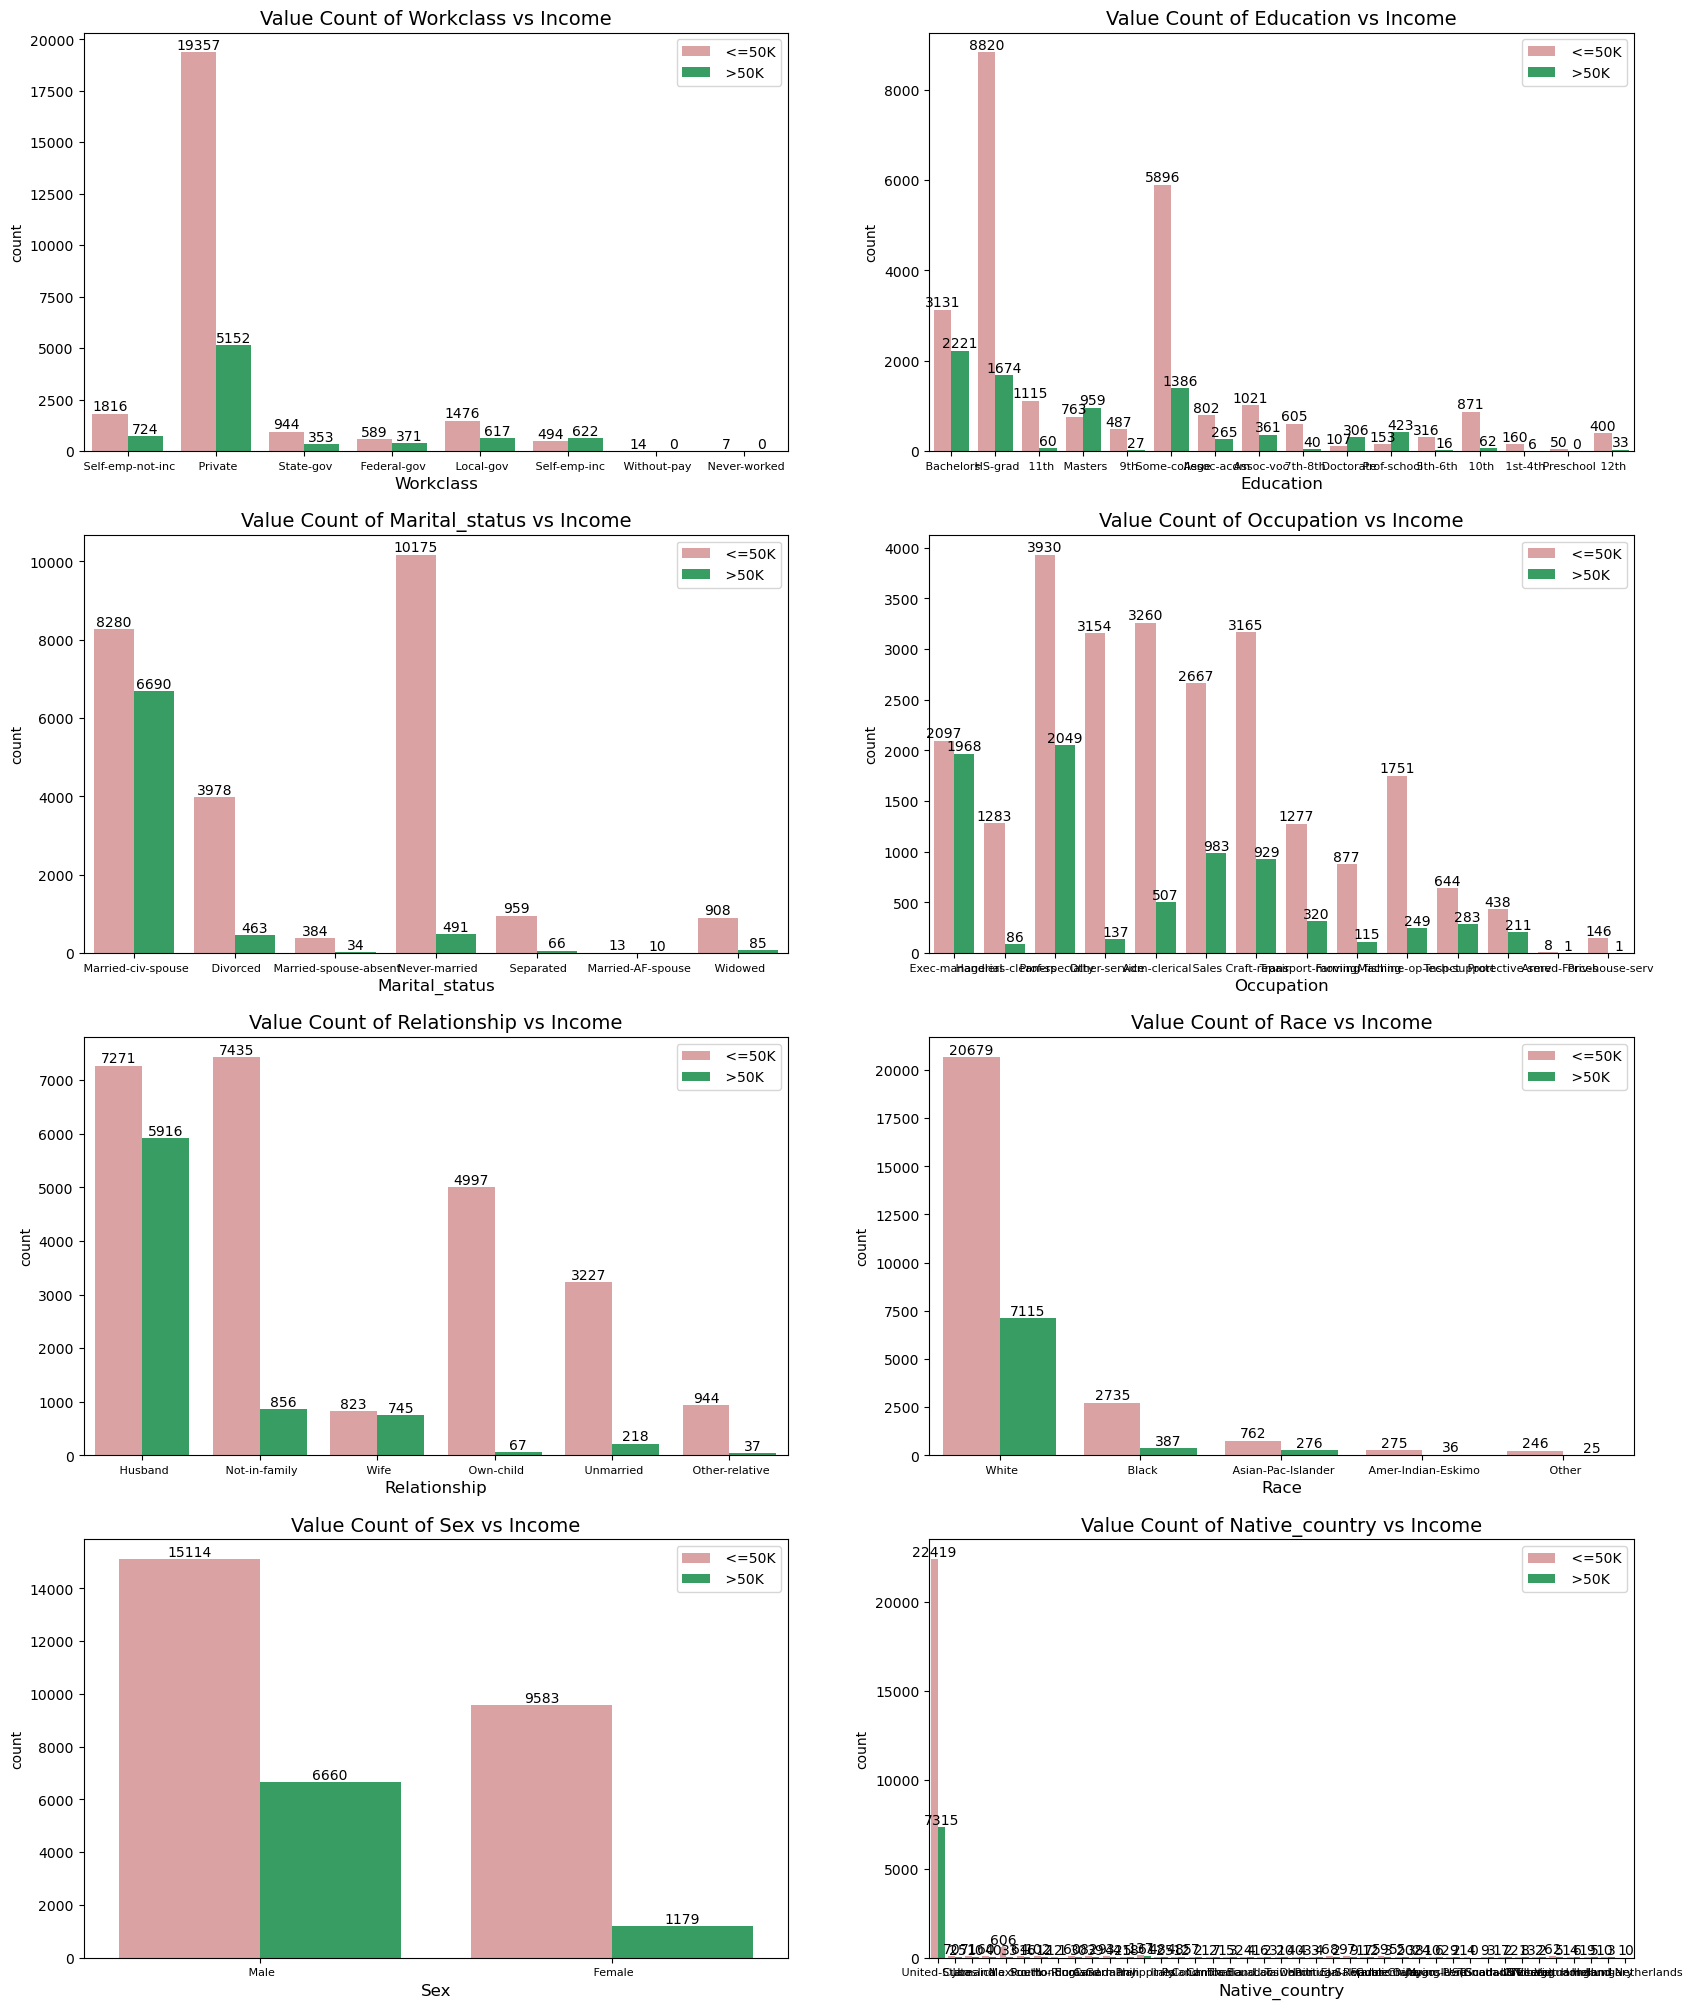

In [42]:
# Visualization of Categorical column Vs Income
plt.figure(figsize=(20, 25))
p = 1

for i in cat_col:
    if p <= 8:
        plt.subplot(4, 2, p)
        custom_palette = ["#E5989B", "#27AE60"]  
        ax = sns.countplot(x=i, hue='Income', data=df, palette=custom_palette)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Income', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=8)
        plt.legend()
    p += 1

plt.show()

**Observations:**

**Income vs. Workclass:**
- For individuals with an income less than or equal to 50K, the highest count is in the "Private" workclass, representing 78.98% of the total.
- For individuals with an income greater than 50K, the "Private" workclass is still the largest, but it represents a lower percentage at 21.02%.

**Income vs. Education:**
- Among individuals with an income less than or equal to 50K, the majority have educational backgrounds such as "HS-grad," "Some-college," and "Bachelors."
- For individuals with an income greater than 50K, a higher percentage have educational backgrounds like "Bachelors," "Masters," "Prof-school," and "Doctorate."

**Income vs. Marital Status:**
- Among those with an income less than or equal to 50K, the "Never-married" category has the highest count and percentage.
- For individuals with an income greater than 50K, the "Married-civ-spouse" category has the highest count and percentage.

**Income vs. Occupation:**
- In the lower income group, "Adm-clerical" and "Craft-repair" are the most common occupations.
- In the higher income group, "Exec-managerial" and "Prof-specialty" occupations dominate.

**Income vs. Relationship:**
- For individuals with an income less than or equal to 50K, the most common relationship status is "Not-in-family."
- For those with an income greater than 50K, "Husband" and "Wife" categories dominate.

**Income vs. Race:**
- Among individuals with an income less than or equal to 50K, "White" is the most common race category.
- For individuals with an income greater than 50K, "White" remains the most common race category.

**Income vs. Sex:**
- In both income groups, males outnumber females. However, the proportion of females is higher in the higher income group.

**Income vs. Native Country:**
- The majority of individuals in both income groups are from the "United-States."
- For individuals with an income greater than 50K, a significant percentage is from the "United-States."

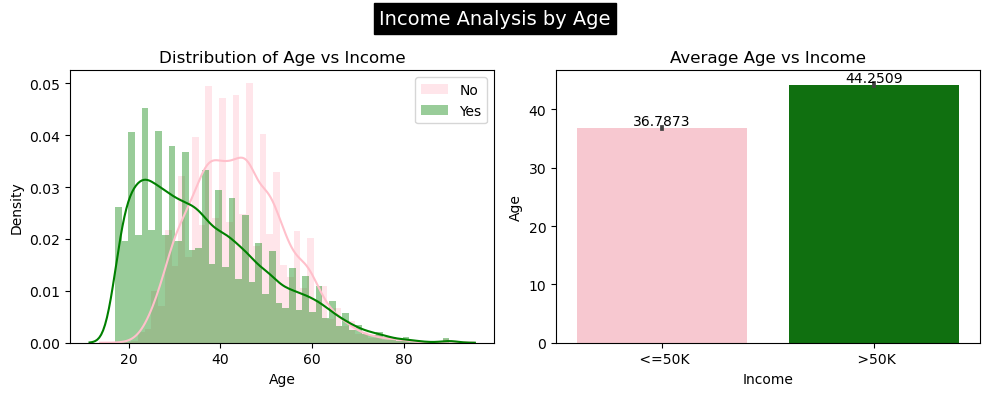

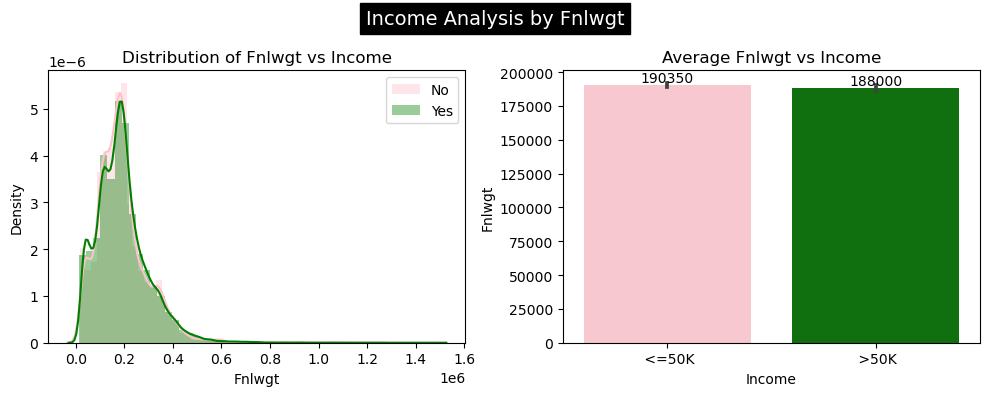

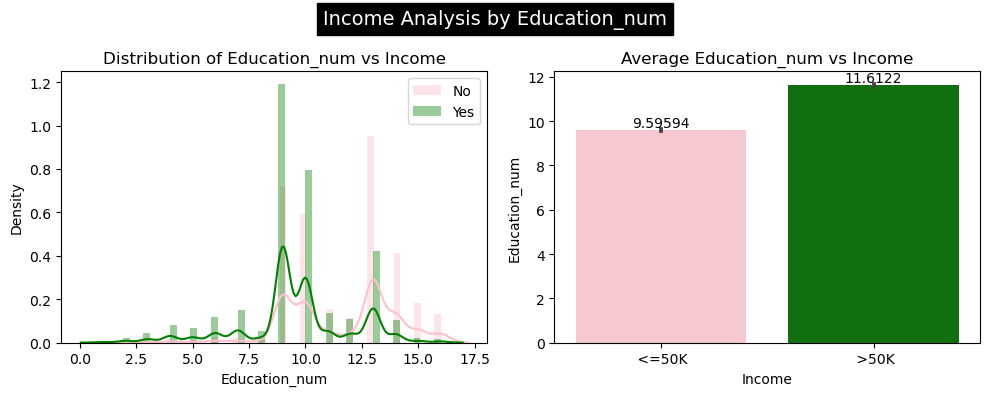

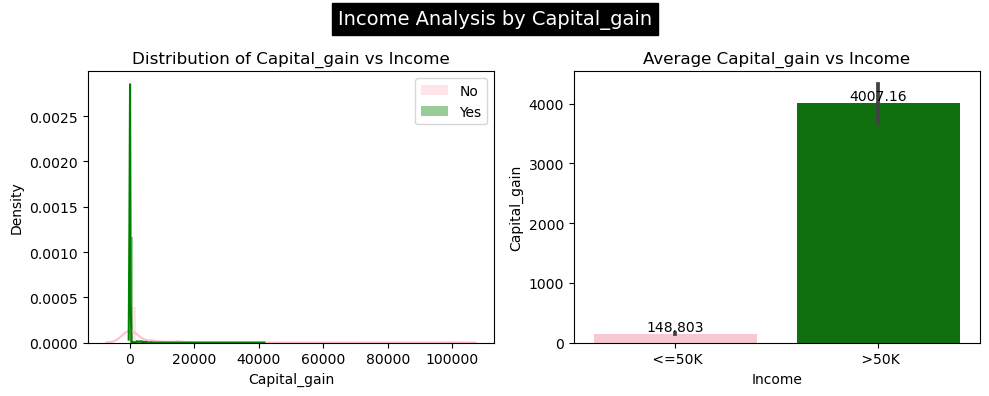

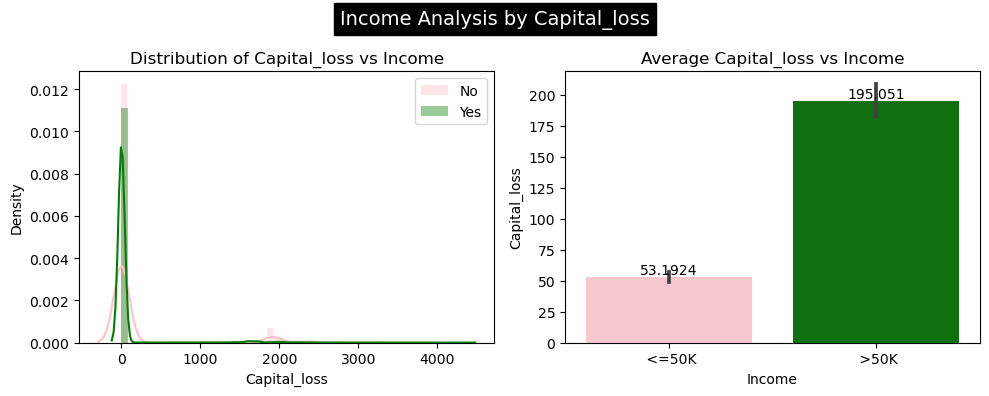

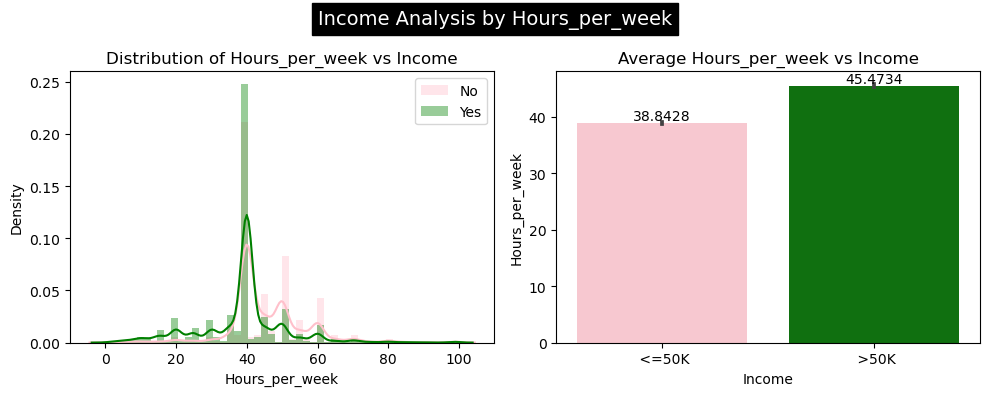

In [44]:
# Visualization of Target column with Numerical Columns
nude_pink = "#FFC0CB"  
green = "#008000"

for i in numerical_columns:
    
    # Create Subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Set a custom color palette
    custom_palette = [nude_pink, green]
    
    # First Plot: Distribution of Numerical columns vs Income
    sns.distplot(df[df['Income'] == " >50K"][i], label="No", color=custom_palette[0], ax=axes[0])
    sns.distplot(df[df['Income'] == " <=50K"][i], label="Yes", color=custom_palette[1], ax=axes[0])
    axes[0].set_title(f"Distribution of {i} vs Income")
    axes[0].legend()
    
    # Second Plot: Avg. Numerical columns vs Income
    ax = sns.barplot(x='Income', y=i, data=df, palette=custom_palette, ax=axes[1])
    for container in ax.containers:
        ax.bar_label(container)
    axes[1].set_title(f'Average {i} vs Income')
    
    fig.suptitle(f"Income Analysis by {i}", fontsize=14, backgroundcolor='black', color='white')
    
    plt.tight_layout()
    
    # Show the plots
    plt.show()

**Observations:**

- **Income vs. Age:**
  - In the lower income group (<= 50K), the age group 17 to 21 has the highest count, representing 100% of individuals in this category.
  - In the higher income group (> 50K), the age group 83 has the highest count, but with a smaller percentage of 33.33%.

- **Income vs. Fnlwgt:**
  - The relationship between final weight (Fnlwgt) and income is not straightforward, as there are many unique values in both income groups.
  - For individuals with an income less than or equal to 50K, there are various unique final weight values, and the percentages vary widely.
  - Similarly, in the higher income group, there are numerous unique final weight values, and the percentages also vary widely.

- **Income vs. Education_num:**
  - In the lower income group, the most common education levels are 9 (HS-grad), 10 (Some-college), and 11 (Bachelors), with varying percentages.
  - In the higher income group, education levels 13 (Masters), 14 (Doctorate), and 15 (Prof-school) are more prominent, with higher percentages.

- **Income vs. Capital_gain:**
  - For individuals with an income less than or equal to 50K, most have a capital gain of 0, representing 79.34%.
  - In the higher income group, various capital gain values are present, and the percentages vary for each.

- **Income vs. Capital_loss:**
  - In the lower income group, the majority have no capital loss (0) with a percentage of 77.22%.
  - In the higher income group, there are various unique capital loss values, and the percentages vary.

- **Income vs. Hours_per_week:**
  - For both income groups, there are various hours worked per week, and the percentages for each value differ. The relationship between hours worked and income is not as clear-cut in this dataset.


In [51]:
df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

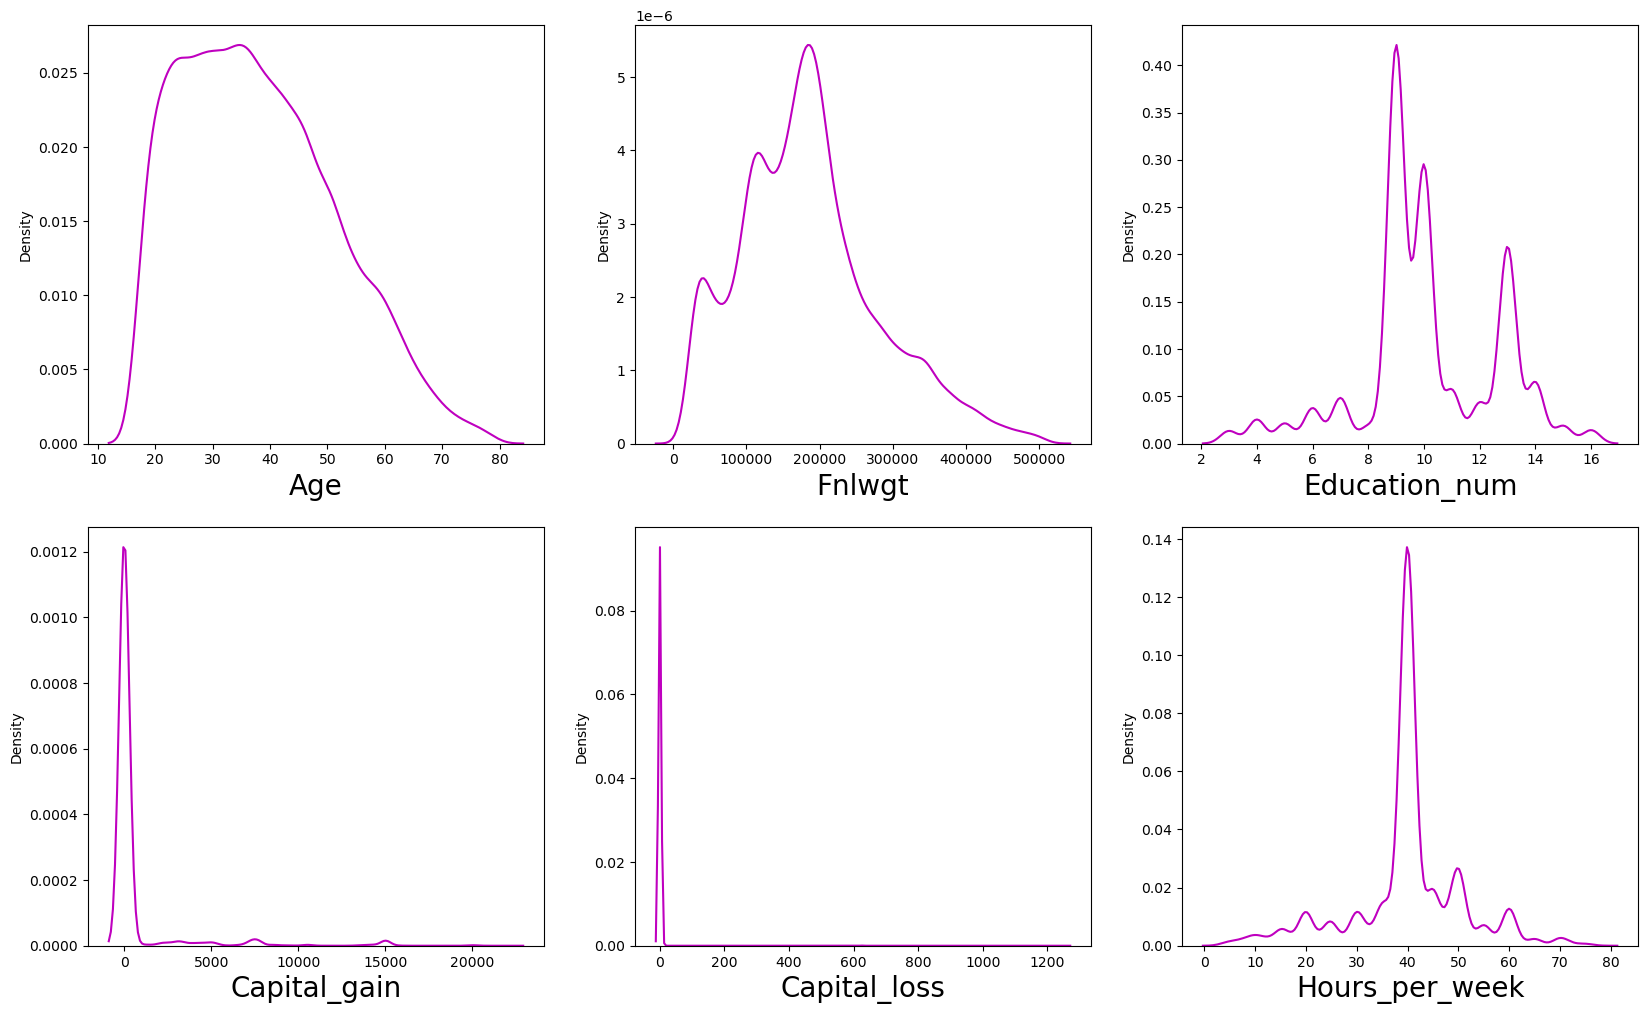

In [52]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in numerical_columns:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.kdeplot(df[column], color='m')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The skewness values provide insights into the shape of the distributions:

- **Age**: Moderately positively skewed (0.49), indicating a slight tail towards older ages.

- **Fnlwgt**: Moderately positively skewed (0.64), suggesting a tail towards higher final weights.

- **Education_num**: Slightly negatively skewed (-0.17), implying a slight tail towards lower education numbers.

- **Capital_gain**: Highly positively skewed (4.94), indicating a pronounced tail towards higher capital gains.

- **Capital_loss**: Highly positively skewed (29.65), signifying a significant tail towards higher capital losses.

- **Hours_per_week**: Slightly negatively skewed (-0.35), suggesting a modest tail towards fewer hours worked per week.

Positive skewness implies a longer right tail, while negative skewness implies a longer left tail in the distribution. Extreme skewness in capital_gain and capital_loss may be indicative of outliers,let's check the same.

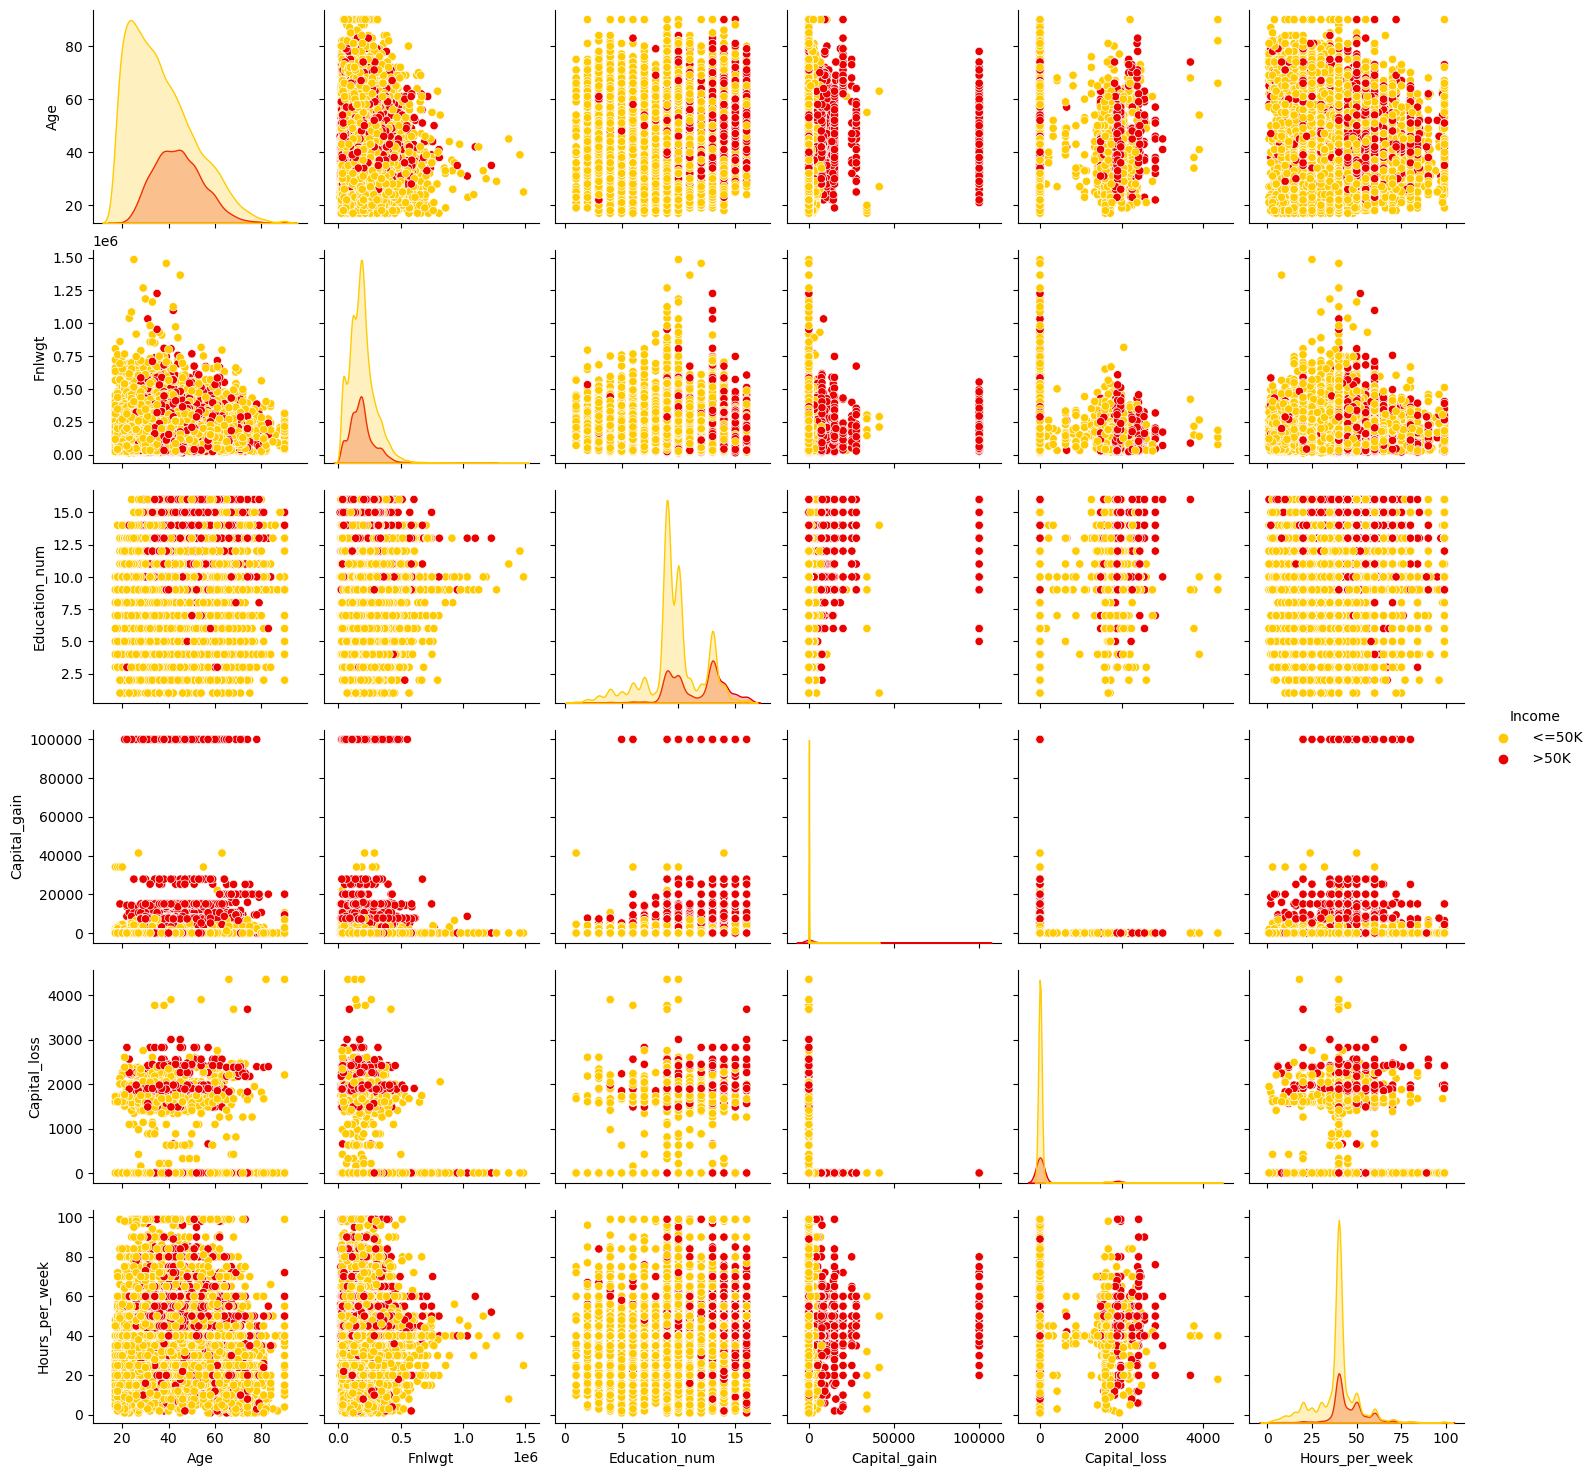

In [45]:
sns.pairplot(df,hue='Income', palette ='hot_r')
plt.show()

**Observation:**

The plot indicates the presence of outliers in several columns. Additionally, histograms are visible along the diagonal axis.

<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #e74c3c;">Outliers</span>
    <span style="color: #3498db;">Removal</span>
</div>

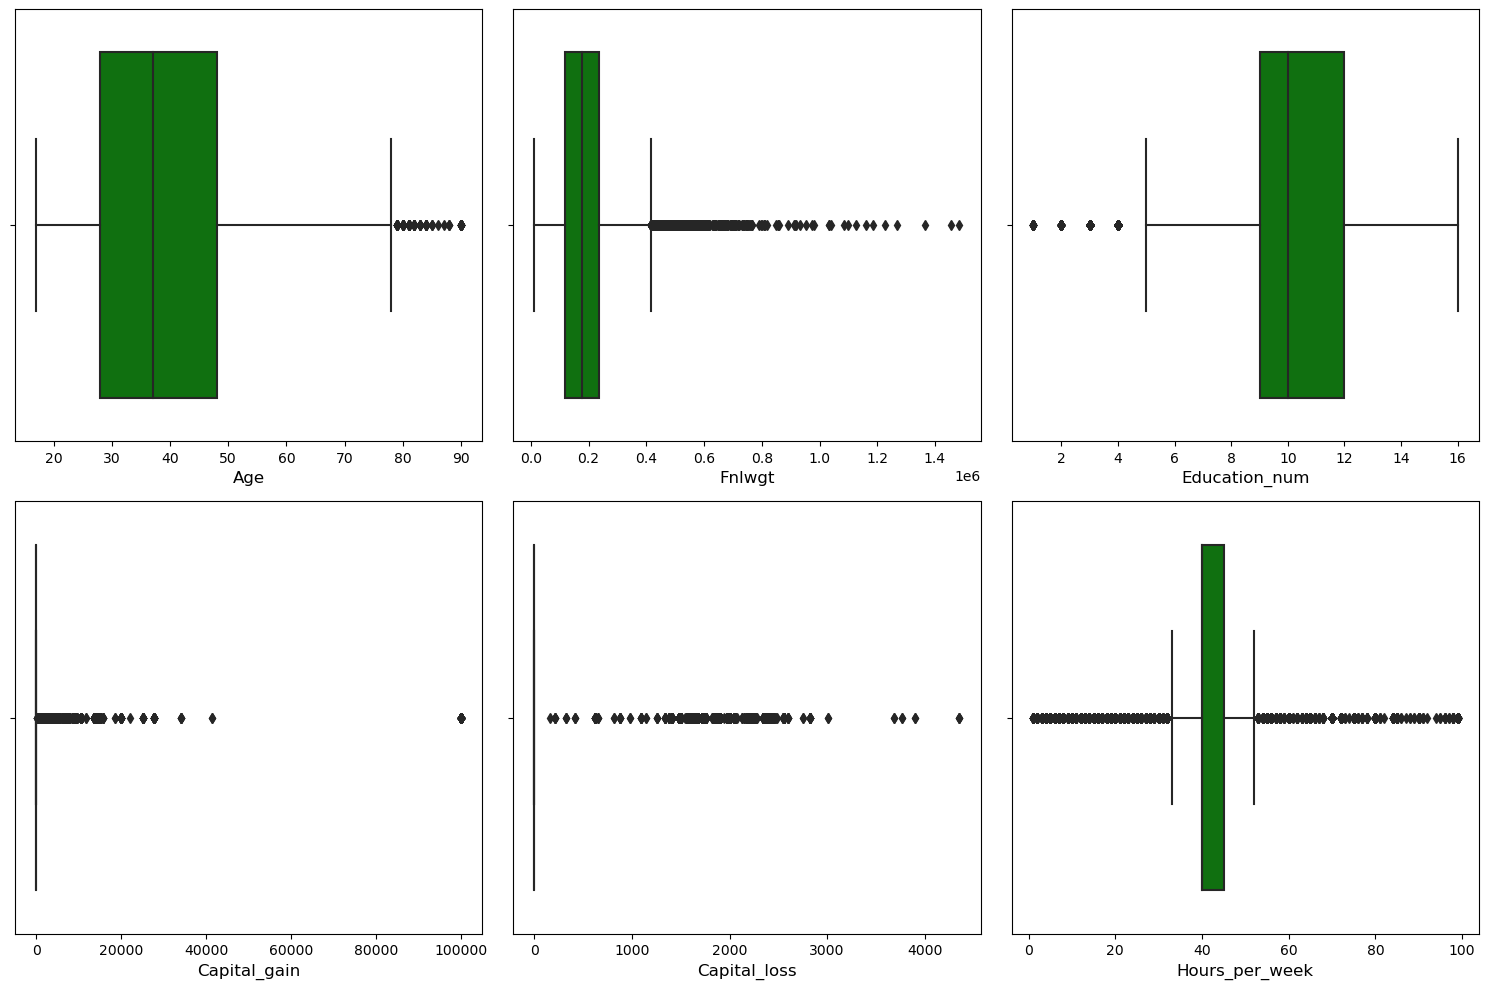

In [48]:
# Identifying the outliers present in numerical columns using boxplot
plt.figure(figsize=(15,10))
plotnumber=1
for col in numerical_columns:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(x=col, data=df,color='green')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [49]:
# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df[numerical_columns]))

# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[(z < 3).all(axis=1)]
df1.shape

(29808, 15)

In [50]:
df=df1
df.shape

(29808, 15)

<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #e74c3c;">Encoding</span>
    <span style="color: #3498db;">Categorical</span>
    <span style="color: #2ecc71;">Columns</span>
</div>

In [53]:
# Initating Label Encoder
le = LabelEncoder()

#Iterate over Categorical columns
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,8,13,2,3,0,4,1,0,0,13,37,0
1,38,3,215646,10,9,0,5,1,4,1,0,0,40,37,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,37,0
3,28,3,338409,8,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,11,14,2,3,5,4,0,0,0,40,37,0


We transformed categorical columns into numerical representations using Label Encoder. This encoding ensures that machine learning models can effectively interpret and process the categorical data.

<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
<span style="color: #2ecc71;">C</span>
<span style="color: #e74c3c;">o</span>
<span style="color: #f39c12;">r</span>
<span style="color: #3498db;">r</span>
<span style="color: #2ecc71;">e</span>
<span style="color: #e74c3c;">l</span>
<span style="color: #f39c12;">a</span>
<span style="color: #3498db;">t</span>
<span style="color: #2ecc71;">i</span>
<span style="color: #e74c3c;">o</span>
<span style="color: #f39c12;">n</span>
</div>    

In [54]:
df_cor = df.corr()
df_cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.032951,-0.074430,-0.004661,0.041431,-0.285335,-0.002594,-0.266802,0.027937,0.086589,0.131014,0.020820,0.091817,-0.001640,0.239314
Workclass,0.032951,1.000000,-0.022991,0.002653,-0.000674,-0.016093,0.008216,-0.057609,0.045442,0.068831,0.011974,-0.010143,0.027270,-0.001685,-0.007180
Fnlwgt,-0.074430,-0.022991,1.000000,-0.023083,-0.037725,0.029000,-0.002200,0.008349,-0.010514,0.028520,-0.002374,0.002579,-0.015489,-0.060659,-0.009160
Education,-0.004661,0.002653,-0.023083,1.000000,0.361097,-0.037416,-0.042764,-0.012924,0.015588,-0.027878,0.027164,-0.000924,0.060787,0.071462,0.074621
Education_num,0.041431,-0.000674,-0.037725,0.361097,1.000000,-0.059092,0.069639,-0.096694,0.028587,0.009276,0.154841,0.009481,0.150713,0.058248,0.318731
Marital_status,-0.285335,-0.016093,0.029000,-0.037416,-0.059092,1.000000,0.035351,0.184713,-0.066169,-0.123350,-0.068272,-0.013817,-0.195162,-0.016736,-0.194355
Occupation,-0.002594,0.008216,-0.002200,-0.042764,0.069639,0.035351,1.000000,-0.036558,-0.003263,0.049930,0.009530,-0.001857,-0.022743,-0.001708,0.030533
Relationship,-0.266802,-0.057609,0.008349,-0.012924,-0.096694,0.184713,-0.036558,1.000000,-0.116226,-0.577197,-0.090370,0.028830,-0.257798,-0.011165,-0.245913
Race,0.027937,0.045442,-0.010514,0.015588,0.028587,-0.066169,-0.003263,-0.116226,1.000000,0.089914,0.023537,0.001324,0.045400,0.117269,0.071755
Sex,0.086589,0.068831,0.028520,-0.027878,0.009276,-0.123350,0.049930,-0.577197,0.089914,1.000000,0.070813,-0.026354,0.233755,0.002282,0.209946


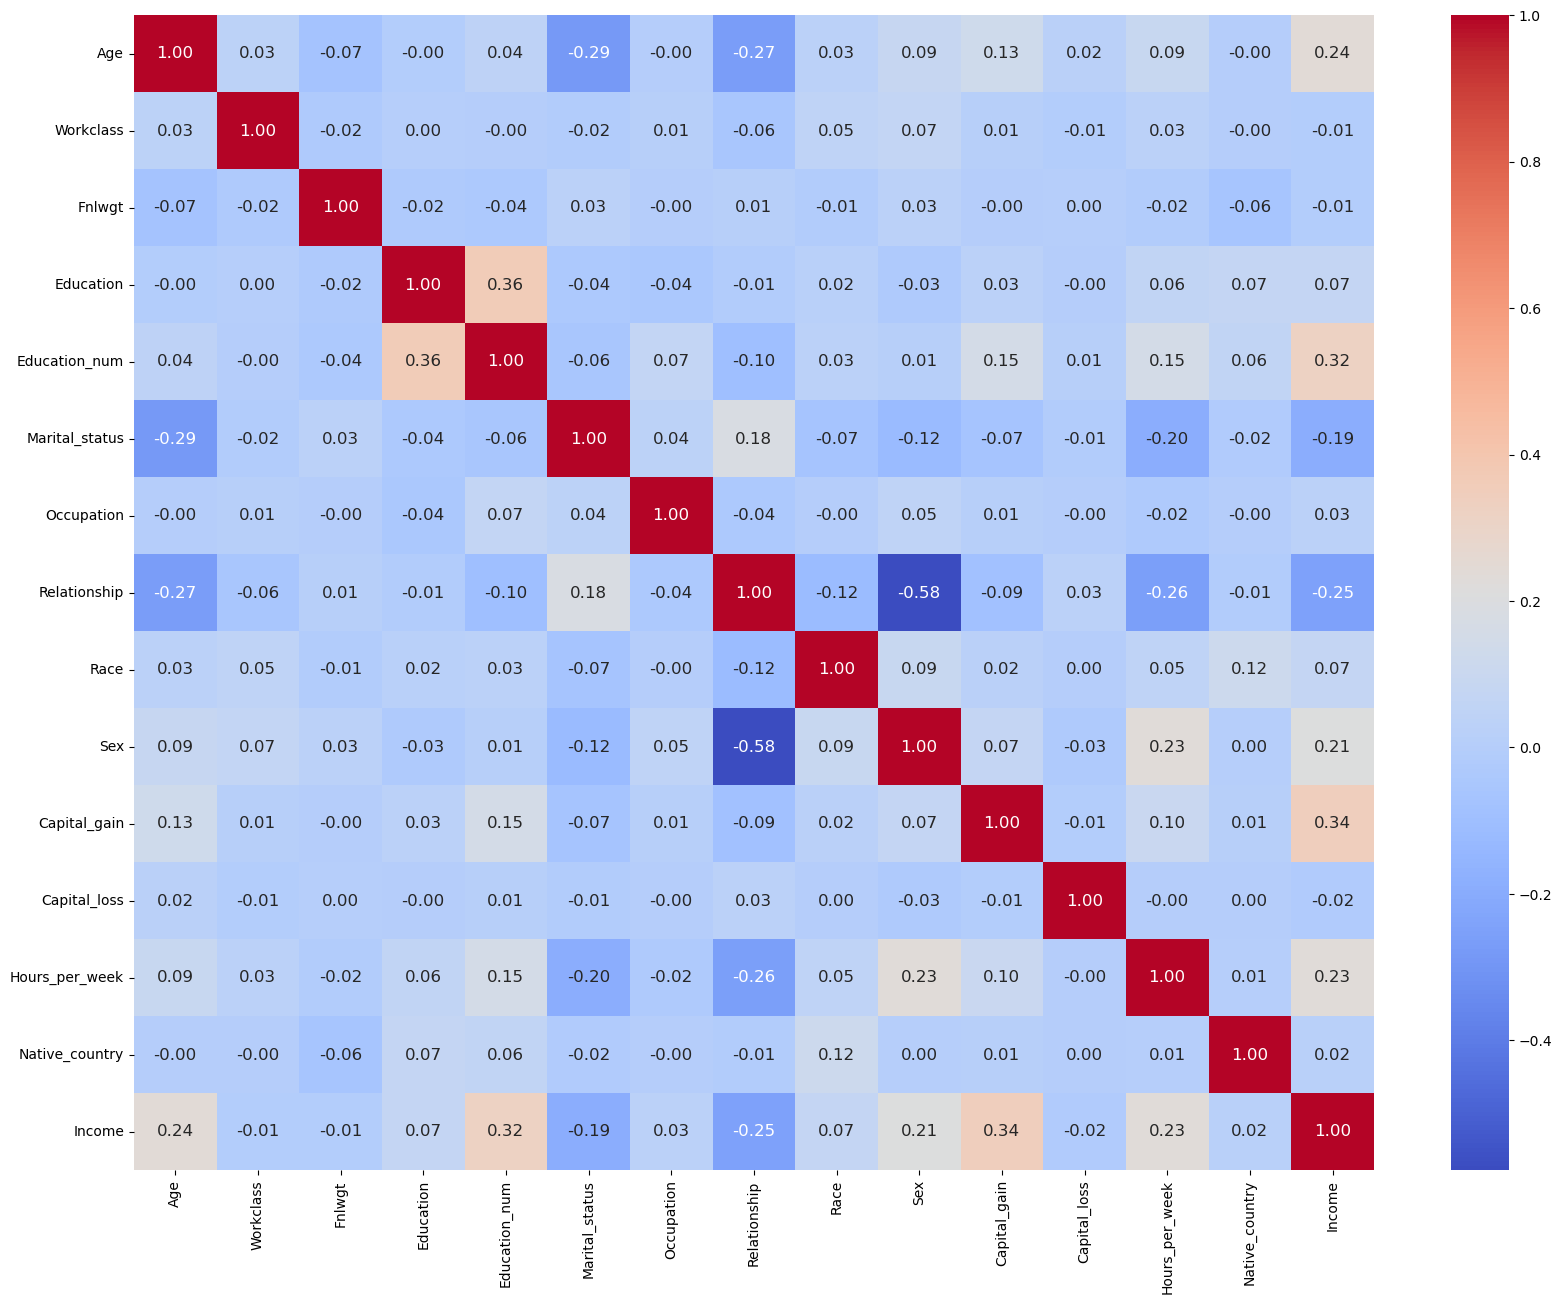

In [55]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_cor, annot=True, fmt='.2F', cmap='coolwarm', annot_kws={"size": 12})
plt.show()

In [56]:
#correlation with target column
correlation_with_Income = df.corr()['Income'].abs().sort_values(ascending=False)
print(correlation_with_Income)

Income            1.000000
Capital_gain      0.342581
Education_num     0.318731
Relationship      0.245913
Age               0.239314
Hours_per_week    0.230589
Sex               0.209946
Marital_status    0.194355
Education         0.074621
Race              0.071755
Occupation        0.030533
Native_country    0.016792
Capital_loss      0.016606
Fnlwgt            0.009160
Workclass         0.007180
Name: Income, dtype: float64


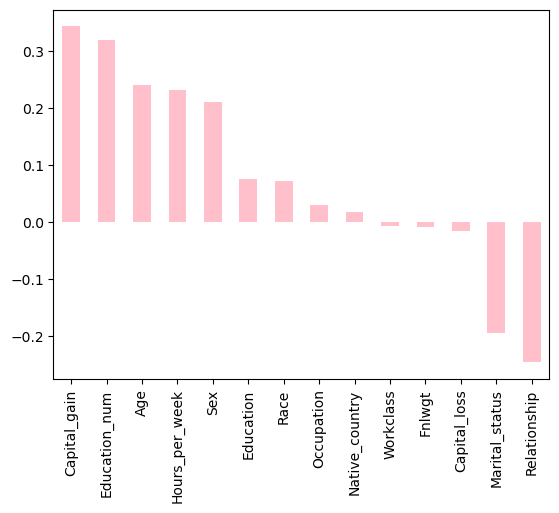

In [57]:
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar', color='pink')
plt.show()

- **Age vs. Income:** The correlation between age and income is positive (0.2393), indicating that as individuals get older, they are more likely to have a higher income.

- **Workclass vs. Income:** The correlation between workclass and income is slightly negative (-0.0072), suggesting a weak relationship between these two variables. Workclass does not seem to strongly influence income.

- **Fnlwgt vs. Income:** There is a weak negative correlation (-0.0092) between final weight (Fnlwgt) and income. This suggests that individuals with higher final weights may be slightly less likely to have a higher income, but the correlation is not significant.

- **Education vs. Income:** Education and income have a positive correlation (0.0746), indicating that individuals with higher education levels are more likely to have a higher income.

- **Education_num vs. Income:** Education_num shows a stronger positive correlation (0.3187) with income than the "Education" variable. This implies that the numerical representation of education years is a better predictor of income.

- **Marital_status vs. Income:** Marital status and income are negatively correlated (-0.1944). Individuals who are married are less likely to have higher income compared to those who are not married.

- **Occupation vs. Income:** The occupation has a moderate positive correlation (0.0305) with income. Some occupations are associated with higher incomes, while others are linked to lower incomes.

- **Relationship vs. Income:** The relationship variable is negatively correlated (-0.2459). This suggests that certain relationship types may be associated with lower income.

- **Race vs. Income:** Race has a positive but weak correlation (0.0718) with income. It indicates that some racial groups may have slightly higher incomes on average.

- **Sex vs. Income:** Gender (sex) is positively correlated (0.2099) with income. Males tend to have higher incomes than females in this dataset.

- **Capital_gain vs. Income:** Capital gain has a strong positive correlation (0.3426) with income. Higher capital gains are associated with higher incomes.

- **Capital_loss vs. Income:** Capital loss has a negative correlation with income (-0.0166), but the correlation is weak, suggesting that capital loss may not strongly affect income.

- **Hours_per_week vs. Income:** There is a moderate positive correlation (0.2306) between hours worked per week and income. Longer working hours are associated with higher incomes.

- **Native_country vs. Income:** Native country has a very weak positive correlation (0.0168) with income. It suggests that the native country of an individual may have a minimal impact on income.

In [58]:
# dropping irrelevant columns
df.drop(columns = ['Fnlwgt','Workclass'],axis=1,inplace=True)

In [59]:
# checking shape after dropping columns
df.shape

(29808, 13)

### Observations

The correlation between "Income" and other features is as follows:

- Positive correlations with "Income" (in descending order): 
  - "Capital_gain" (0.342581)
  - "Education_num" (0.318731)
  - "Relationship" (0.245913)
  - "Age" (0.239314)
  - "Hours_per_week" (0.230589)
  - "Sex" (0.209946)
  - "Marital_status" (0.194355)
  - "Education" (0.074621)
  - "Race" (0.071755)
  - "Occupation" (0.030533)
  - "Native_country" (0.016792)
  - "Capital_loss" (0.016606)

- Features "Fnlwgt" (0.009160) and "Workclass" (0.007180) have relatively weak positive correlations with "Income."

We removed features with weak positive correlations with "Income." As a result, we now have a dataset with 13 columns and 29,808 rows.


<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #e74c3c;">Machine</span>
    <span style="color: #3498db;">Learning</span>
</div>

In [60]:
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

# Checking the dimenstion of X & Y
X.shape, Y.shape

((29808, 12), (29808,))

In [61]:
scaler= StandardScaler()

X_scale = scaler.fit_transform(X)
X = pd.DataFrame(X_scale, columns=X.columns)
X

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887304,-0.340122,1.191227,-0.410260,-0.780453,-0.919032,0.393999,0.716254,-0.244524,-0.036984,-2.415235,0.257250
1,-0.011046,0.249488,-0.439623,-1.730676,-0.278831,-0.297940,0.393999,0.716254,-0.244524,-0.036984,0.009070,0.257250
2,1.111891,-2.403756,-1.255048,-0.410260,-0.278831,-0.919032,-1.956981,0.716254,-0.244524,-0.036984,0.009070,0.257250
3,-0.759670,-0.340122,1.191227,-0.410260,0.724414,2.186429,-1.956981,-1.396153,-0.244524,-0.036984,0.009070,-5.413799
4,-0.085908,0.544293,1.598939,-0.410260,-0.780453,2.186429,0.393999,-1.396153,-0.244524,-0.036984,0.009070,0.257250
...,...,...,...,...,...,...,...,...,...,...,...,...
29803,-0.834532,-0.929731,0.783514,-0.410260,1.476848,2.186429,0.393999,-1.396153,-0.244524,-0.036984,-0.170508,0.257250
29804,0.138679,0.249488,-0.439623,-0.410260,-0.028019,-0.919032,0.393999,0.716254,-0.244524,-0.036984,0.009070,0.257250
29805,1.486203,0.249488,-0.439623,2.230572,-1.532886,1.565337,0.393999,-1.396153,-0.244524,-0.036984,0.009070,0.257250
29806,-1.208844,0.249488,-0.439623,0.910156,-1.532886,0.944244,0.393999,0.716254,-0.244524,-0.036984,-1.786711,0.257250


In [62]:
# Multicollinearity 
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.172744,Age
1,1.162696,Education
2,1.218475,Education_num
3,1.137109,Marital_status
4,1.016283,Occupation
5,1.672411,Relationship
6,1.030979,Race
7,1.545478,Sex
8,1.049131,Capital_gain
9,1.002276,Capital_loss


The Variance Inflation Factor (VIF) values for our independent features are well below the threshold of 10, indicating no significant multicollinearity issues among these variables.

In [63]:
#class imbalance
Y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

In [64]:
X,Y=SMOTE().fit_resample(X,Y)
Y.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

In [66]:
# Initialize all the classification models
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (XGB_model, "XGBClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
    (SV_model, "Support Vector Classifier"),
]

# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    best_cv_score = 0

    for random_state in range(1, 101):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculating the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    # Compute cross-validation score for the model after fitting
    cv_scores = cross_val_score(model, X, Y, cv=5)
    best_cv_score = cv_scores.mean()

    print(f"Model: {model_name}")
    print(f"Best Random State: {best_random_state}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"Support: {support}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Cross-Validation Score: {best_cv_score}")
    print("===" * 40)

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()],
        "Cross-Validation Score": best_cv_score
    }

    model_performances.append(model_performance)

model_performance_df = pd.DataFrame(model_performances)

model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model: Logistic Regression
Best Random State: 50
Accuracy: 0.7755146106232906
Precision: 0.7755710923642438
Recall: 0.7755146106232906
F1-Score: 0.7755248180953256
Support: 13894.0
Confusion Matrix:
[[5322 1526]
 [1593 5453]]
Cross-Validation Score: 0.7670799998312234
Model: Decision Tree Classifier
Best Random State: 60
Accuracy: 0.8577803368360444
Precision: 0.8578027863985533
Recall: 0.8577803368360444
F1-Score: 0.8577733577905912
Support: 13894.0
Confusion Matrix:
[[6033  956]
 [1020 5885]]
Cross-Validation Score: 0.8528914186515765
Model: K-Neighbors Classifier
Best Random State: 40
Accuracy: 0.8549733697999137
Precision: 0.8595161418628685
Recall: 0.8549733697999137
F1-Score: 0.8543766886250056
Support: 13894.0
Confusion Matrix:
[[5445 1407]
 [ 608 6434]]
Cross-Validation Score: 0.8477073767920066
Model: Random Forest Classifier
Best Random State: 69
Accuracy: 0.8856340866561105
Precision: 0.8856638606864731
Recall: 0.8856340866561105
F1-Score: 0.8856330030838437
Support: 13894.0

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
6,XGBClassifier,35,0.893839,0.894024,0.893839,0.893823,13894.0,"[[[6115, 814], [661, 6304]]]",0.883639
4,ExtraTrees Classifier,42,0.886354,0.886354,0.886354,0.886354,13894.0,"[[[6134, 789], [790, 6181]]]",0.888562
3,Random Forest Classifier,69,0.885634,0.885664,0.885634,0.885633,13894.0,"[[[6137, 824], [765, 6168]]]",0.883229
8,BaggingClassifier,60,0.877861,0.877891,0.877861,0.877854,13894.0,"[[[6175, 814], [883, 6022]]]",0.871828
1,Decision Tree Classifier,60,0.857780,0.857803,0.857780,0.857773,13894.0,"[[[6033, 956], [1020, 5885]]]",0.852891
2,K-Neighbors Classifier,40,0.854973,0.859516,0.854973,0.854377,13894.0,"[[[5445, 1407], [608, 6434]]]",0.847707
9,AdaBoostClassifier,60,0.850511,0.851517,0.850511,0.850433,13894.0,"[[[5769, 1220], [857, 6048]]]",0.843000
10,Support Vector Classifier,42,0.836188,0.839947,0.836188,0.835697,13894.0,"[[[5417, 1506], [770, 6201]]]",0.829051
0,Logistic Regression,50,0.775515,0.775571,0.775515,0.775525,13894.0,"[[[5322, 1526], [1593, 5453]]]",0.767080
5,RidgeClassifier,40,0.772276,0.772313,0.772276,0.772227,13894.0,"[[[5205, 1647], [1517, 5525]]]",0.763992


In [67]:
#Data splitting for train and test Data with best random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=46)

# Define the hyperparameters to search
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=XGB_model,
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Perform the random search on your training data
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a classifier with the best parameters
best_xgb = XGBClassifier(**best_params)

# Fit the best classifier on the training data
best_xgb.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred_xgb)
print("Best Accuracy:", accuracy)

# Print classification report
class_report = classification_report(Y_test, Y_pred_xgb)
print("Classification Report:")
print(class_report)

# Perform cross-validation and print scores
cross_val_scores = cross_val_score(best_xgb, X_train, Y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", np.mean(cross_val_scores))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Accuracy: 0.8925435439758169
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6919
           1       0.89      0.90      0.89      6975

    accuracy                           0.89     13894
   macro avg       0.89      0.89      0.89     13894
weighted avg       0.89      0.89      0.89     13894

Cross-Validation Scores: [0.88942011 0.8815546  0.88664405 0.8910998  0.88770631]
Mean CV Score: 0.8872849724277694


ROC AUC Score Of XGB Classifier: 0.9646950037841878


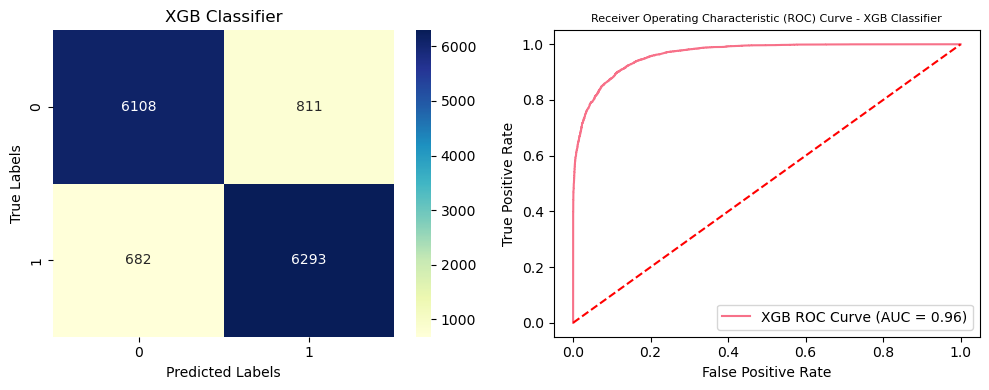

In [68]:
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot XGB Classifier Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('XGB Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')


# Calculate ROC AUC Score for xgb Classifier
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(Y_test, y_prob_xgb)
print("ROC AUC Score Of XGB Classifier:", auc_score_xgb)

# Calculate ROC curves for xgb classifiers
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_prob_xgb)

# Plot ROC curve for XGB Classifier
axes[1].plot(fpr_xgb, tpr_xgb, label='XGB ROC Curve (AUC = {:.2f})'.format(auc_score_xgb))
axes[1].plot([0, 1], [0, 1], 'r--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve - XGB Classifier', fontsize=8)
axes[1].legend(loc='lower right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [69]:
filename= 'census_income.pkl'
pickle.dump(best_xgb, open(filename, 'wb'))

In [71]:
# Load the saved XGBClassifier model from the file
filename = 'census_income.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

# Make predictions on x_test
predicted = loaded_model.predict(X_test)

# Checking predicted and original values
original = np.array(Y_test)

# Create a DataFrame for comparison
Census_Income_Prediction = pd.DataFrame({'Original': original, 'Predicted': predicted})
print(Census_Income_Prediction)

# Calculate accuracy
accuracy = (Census_Income_Prediction['Original'] == Census_Income_Prediction['Predicted']).mean() * 100
print(f"Accuracy: {accuracy:.2f}%")

       Original  Predicted
0             0          1
1             1          1
2             1          1
3             0          0
4             1          1
...         ...        ...
13889         1          1
13890         0          0
13891         0          0
13892         1          1
13893         0          0

[13894 rows x 2 columns]
Accuracy: 89.25%


<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap">

<div style="padding: 10px; text-align: left; font-size: 34px; font-weight: bold; font-family: 'Pacifico', cursive;">
    <span style="color: #2ecc71;">Conclusion:</span>
    <span style="color: #3498db;">XGBClassifier</span>
    <span style="color: #2ecc71;">for Census Income Prediction</span>
</div>


In conclusion, the **XGBClassifier** stands out as the preferred model for census income prediction based on the provided metrics. With a best random state of 35, it achieves an **accuracy of approximately 89.38%**, **precision of 89.40%**, **recall of 89.38%**, and an **F1-Score of 89.38%**. The confusion matrix reveals robust performance, particularly in minimizing false positives and false negatives. Additionally, the **cross-validation score of 88.36%** further supports the model's consistent generalization across different subsets of the dataset. Overall, the **XGBClassifier** demonstrates strong predictive capabilities and is recommended for use in census income prediction tasks.
